In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

query_1 = pd.read_csv('query_1_result.csv')
query_2 = pd.read_csv('query_2_result.csv')
query_3 = pd.read_csv('query_3_result.csv')
query_4 = pd.read_csv('query_4_result.csv')
query_5 = pd.read_csv('query_5_result.csv')

# Query 1: Top 10 tracks listened to

In [2]:
query_1

,track,artist,popularity,album,genre,concat
0,Under Your Spell,Snow Strippers,78,April Mixtape 3,Electronic,3:38
1,Vehicle Dissolve,Provoker,33,Body Jumper,Alternative Rock,3:21
2,No Nein,1tbsp,54,No Nein,House,2:31
3,Sleeves Touch My Elbows,1tbsp,41,Mosquito Love,House,3:30
4,Hypernight,Title Fight,41,Hyperview,Alternative Rock,2:56
5,Telling You to Love Me,Butschi,22,Telling You to Love Me,Dance,6:20
6,Sleight Of Hand,Provoker,26,Demon Compass,Alternative Rock,2:45
7,Rose In A Glass,Provoker,48,Body Jumper,Alternative Rock,2:58
8,gonmakit,Brennan Jones,46,gonmakit,Rap,1:03
9,Power,Xavier Wulf,37,Shut up Be Quiet,Rap,4:08


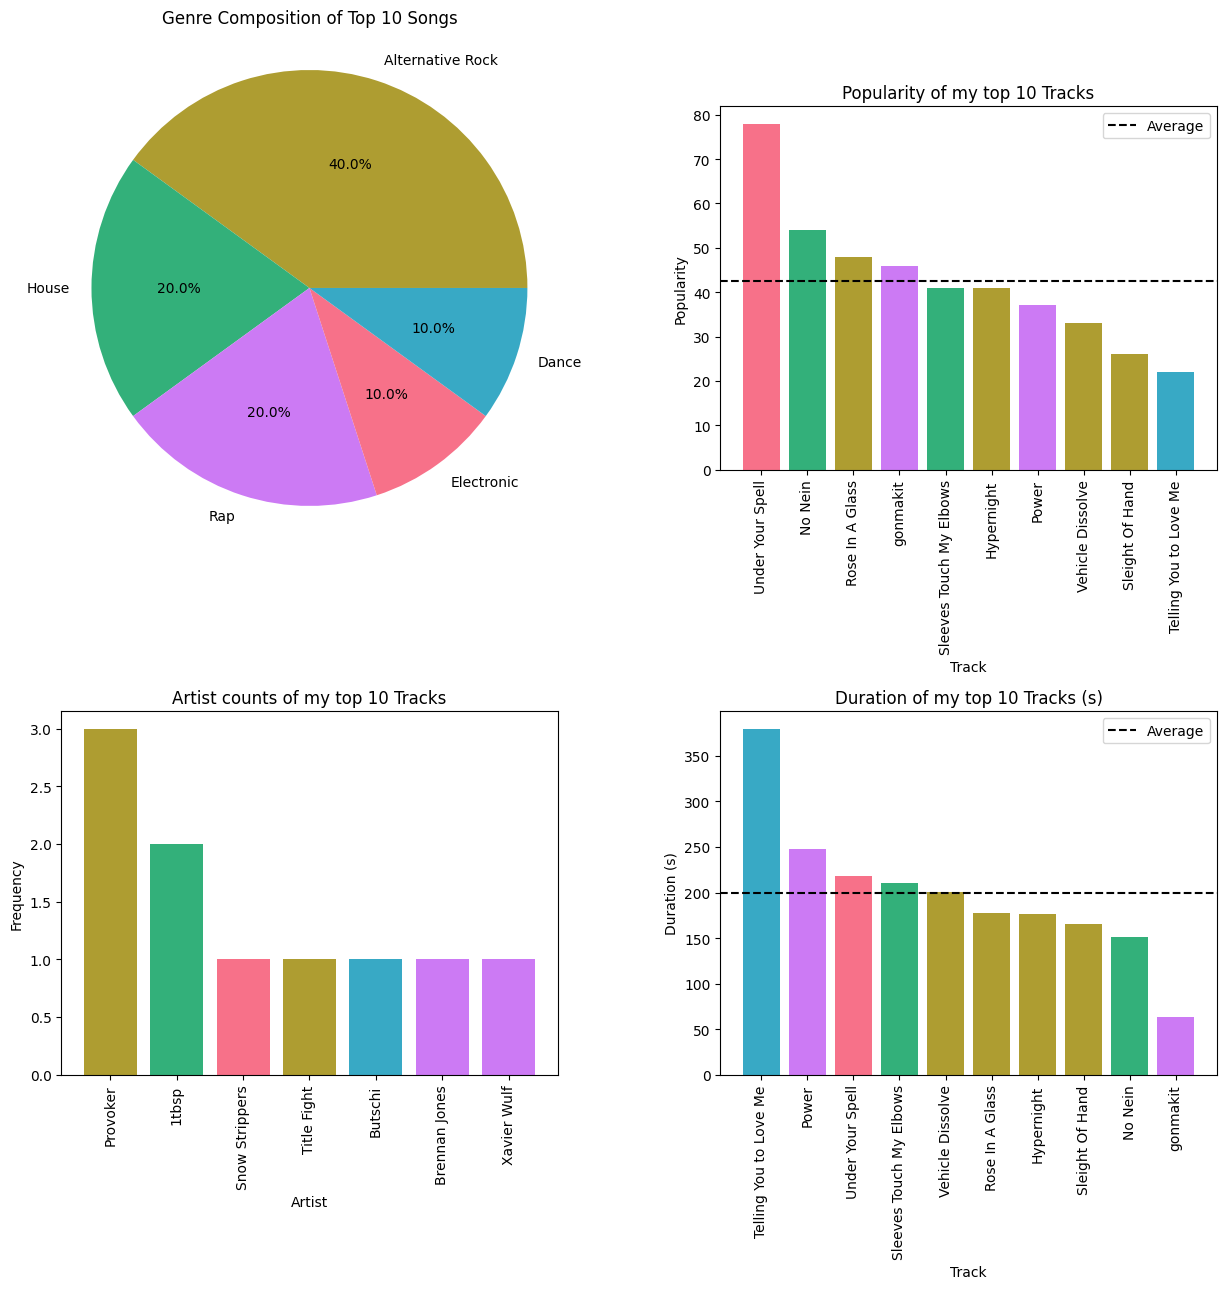

In [3]:
colors = sns.husl_palette(n_colors= 5)
color_map = {genre: color for genre, color in zip(query_1['genre'].unique(), colors)}
query_1['colors'] = query_1['genre'].map(color_map)


fig, ax = plt.subplots(2, 2, figsize=(13, 13))
ax_1 = ax[0][0]
ax_2 = ax[0][1]
ax_3 = ax[1][0]
ax_4 = ax[1][1]

# First subplot
ax_1.set_title('Genre Composition of Top 10 Songs', pad= 60)
ax_1.pie(query_1['genre'].value_counts(),
         labels=query_1['genre'].value_counts().index,
         autopct='%1.1f%%',
         colors= query_1['colors'].value_counts().index,
         radius= 1.5)

# Second subplot
ax_2.set_title('Popularity of my top 10 Tracks')
ax_2.bar(query_1.sort_values(by= 'popularity', ascending= False)['track'],
         query_1['popularity'].sort_values(ascending= False),
         color= query_1.sort_values(by= 'popularity', ascending= False)['colors'])
ax_2.axhline(query_1['popularity'].mean(), ls= '--', color= 'black', label= 'Average')
ax_2.legend()
ax_2.set_xlabel('Track')
ax_2.set_ylabel('Popularity')
ax_2.tick_params(axis='x', rotation=90)

# Third subplot
artist_counts = query_1['artist'].value_counts()
artist_colors = [color_map[query_1[query_1['artist'] == artist].iloc[0]['genre']] for artist in artist_counts.index]

ax_3.set_title('Artist counts of my top 10 Tracks')
ax_3.bar(query_1['artist'].value_counts().index, query_1['artist'].value_counts(), color= artist_colors)
ax_3.set_xlabel('Artist')
ax_3.set_ylabel('Frequency')
ax_3.tick_params(axis='x', rotation=90)


# Fourth subplot
query_1['duration_s'] = pd.to_datetime(query_1['concat'], format='%M:%S')
query_1['duration_s'] = query_1['duration_s'].dt.minute * 60 + query_1['duration_s'].dt.second

ax_4.set_title('Duration of my top 10 Tracks (s)')
ax_4.bar(query_1.sort_values(by= 'duration_s', ascending= False)['track'],
         query_1['duration_s'].sort_values(ascending= False),
         color= query_1.sort_values(by= 'duration_s', ascending= False)['colors'])
ax_4.axhline(query_1['duration_s'].mean(), ls= '--', color= 'black', label= 'Average')
ax_4.legend()
ax_4.set_xlabel('Track')
ax_4.set_ylabel('Duration (s)')
ax_4.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

From my top 10 listened to songs, alternative rock is my most listened to genre from my top 10 songs. With a second being, the general electronic scene that includes house, electrinic, and dance. The popularity of my tracks listened to is interesting because although alternative rock is one of my most listened to genres from the top 10 songs, only 1 song out of the 4 from the top 10 have a popularity above the average (~43). While electronic has the highest popularity with 78, followed by a house song that has a popularity of 54. My most listened to artist out of the top 10 songs listened is Provoker with 3 songs in my top 10. Lastly, the last plot shows the track length and its time in seconds. The average time is 200 seconds which is around 3 minutes and 20 seconds. Looking at this plot and comparing it to the popularity plot, it seems that there is a slight coorelation where the longer the song is the more likely it is to be not that popular. Tracks like power and telling you to love me exceed the average time significantly and also fall below the average popularity. Next I will look into the entire genre compositon from my top tracks.

# Queries 2/3: Top Tracks and Top Artists Genre Composostion

In [4]:
query_2

,genre,genre_percentage
0,Rap,25.20
1,Electronic,14.06
2,House,11.08
3,Dance,10.80
4,Alternative Rock,10.24
5,Indie,9.67
6,Jazz,5.51
7,Hip Hop,3.43
8,Techno,2.14
9,Reggae,1.86


query 2 is the genre composition from my top tracks

In [5]:
query_3

,genre,genre_percentage
0,Rap,24.76
1,Electronic,12.14
2,House,11.17
3,Alternative Rock,10.68
4,Indie,10.68
5,Dance,10.19
6,Hip Hop,5.83
7,Jazz,3.88
8,Soul,1.94
9,Rock,1.94


query 3 is the genre compositon of my top artists

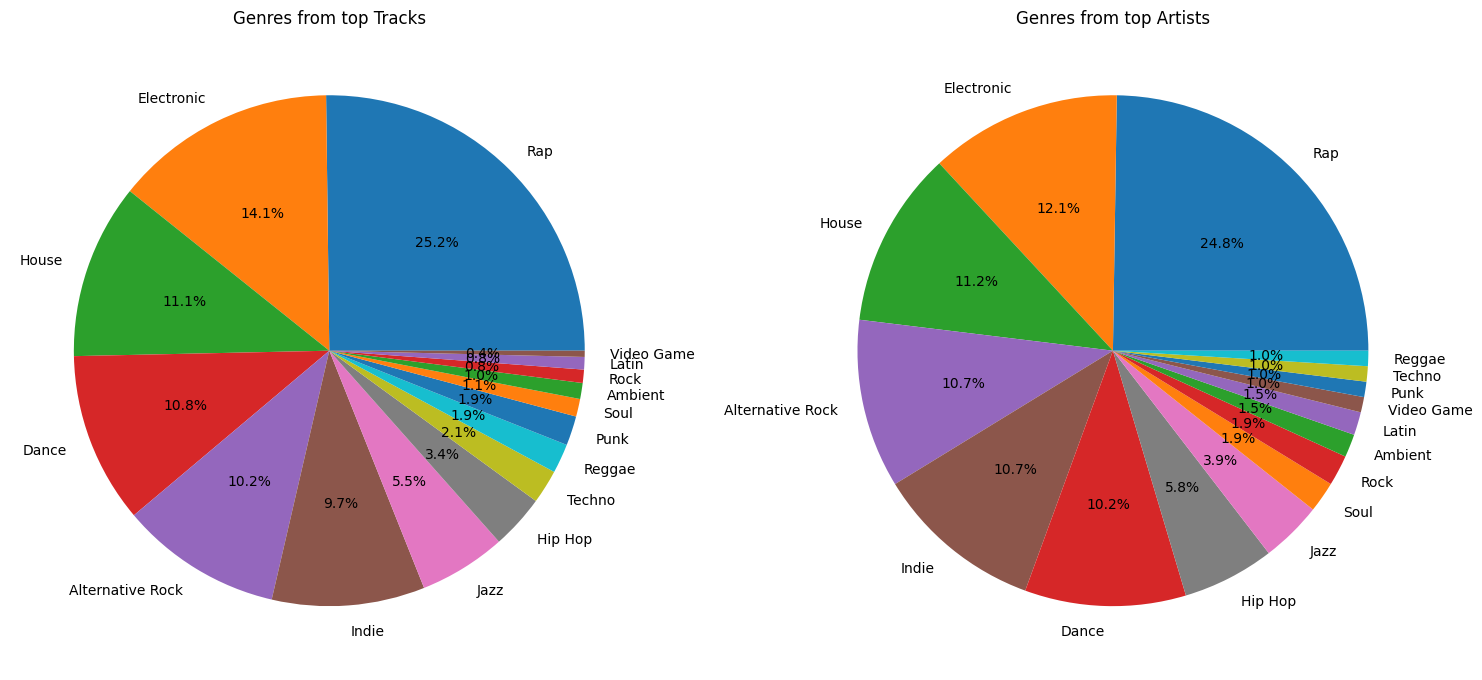

In [6]:
colors = sns.color_palette(n_colors= 16)
color_map = {genre: color for genre, color in zip(query_2['genre'].unique(), colors)}
query_2['colors'] = query_2['genre'].map(color_map)
query_3['colors'] = query_3['genre'].map(color_map)

fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize= (15,15))
ax_1.set_title('Genres from top Tracks')
ax_1.pie(query_2['genre_percentage'], labels=query_2['genre'], autopct='%1.1f%%', colors= query_2['colors'])


ax_2.set_title('Genres from top Artists')
ax_2.pie(query_3['genre_percentage'], labels=query_3['genre'], autopct='%1.1f%%', colors= query_3['colors'])
plt.tight_layout()
plt.show()

The difference in genre composition from my top tracks and top artists looks to be pretty similar with slight discrepancies between the two pie charts. Since I have so many genres, it a bit hard to tell the differences for some of the smaller genres that I have listened to, so I will construct a bar graph to help with visibility.

In [7]:
#preparation for bar graph
joined_query = query_2.merge(query_3, on= 'genre')
joined_query.rename(columns= {'genre_percentage_x': 'genre_percentage_tracks', 'genre_percentage_y': 'genre_percentage_artists'}, inplace= True)
joined_query.head()

,genre,genre_percentage_tracks,colors_x,genre_percentage_artists,colors_y
0,Rap,25.20,"(0.12156862745098039, 0.4666666666666667, 0.70...",24.76,"(0.12156862745098039, 0.4666666666666667, 0.70..."
1,Electronic,14.06,"(1.0, 0.4980392156862745, 0.054901960784313725)",12.14,"(1.0, 0.4980392156862745, 0.054901960784313725)"
2,House,11.08,"(0.17254901960784313, 0.6274509803921569, 0.17...",11.17,"(0.17254901960784313, 0.6274509803921569, 0.17..."
3,Dance,10.80,"(0.8392156862745098, 0.15294117647058825, 0.15...",10.19,"(0.8392156862745098, 0.15294117647058825, 0.15..."
4,Alternative Rock,10.24,"(0.5803921568627451, 0.403921568627451, 0.7411...",10.68,"(0.5803921568627451, 0.403921568627451, 0.7411..."


In [8]:
#preparation for bar graph
fixed_query = pd.melt(joined_query, id_vars= ['genre'],
                      value_vars= ['genre_percentage_tracks', 'genre_percentage_artists'])
print(fixed_query.head())
print(fixed_query.tail())

              genre                 variable  value
0               Rap  genre_percentage_tracks  25.20
1        Electronic  genre_percentage_tracks  14.06
2             House  genre_percentage_tracks  11.08
3             Dance  genre_percentage_tracks  10.80
4  Alternative Rock  genre_percentage_tracks  10.24
         genre                  variable  value
27        Soul  genre_percentage_artists   1.94
28     Ambient  genre_percentage_artists   1.46
29        Rock  genre_percentage_artists   1.94
30       Latin  genre_percentage_artists   1.46
31  Video Game  genre_percentage_artists   0.97


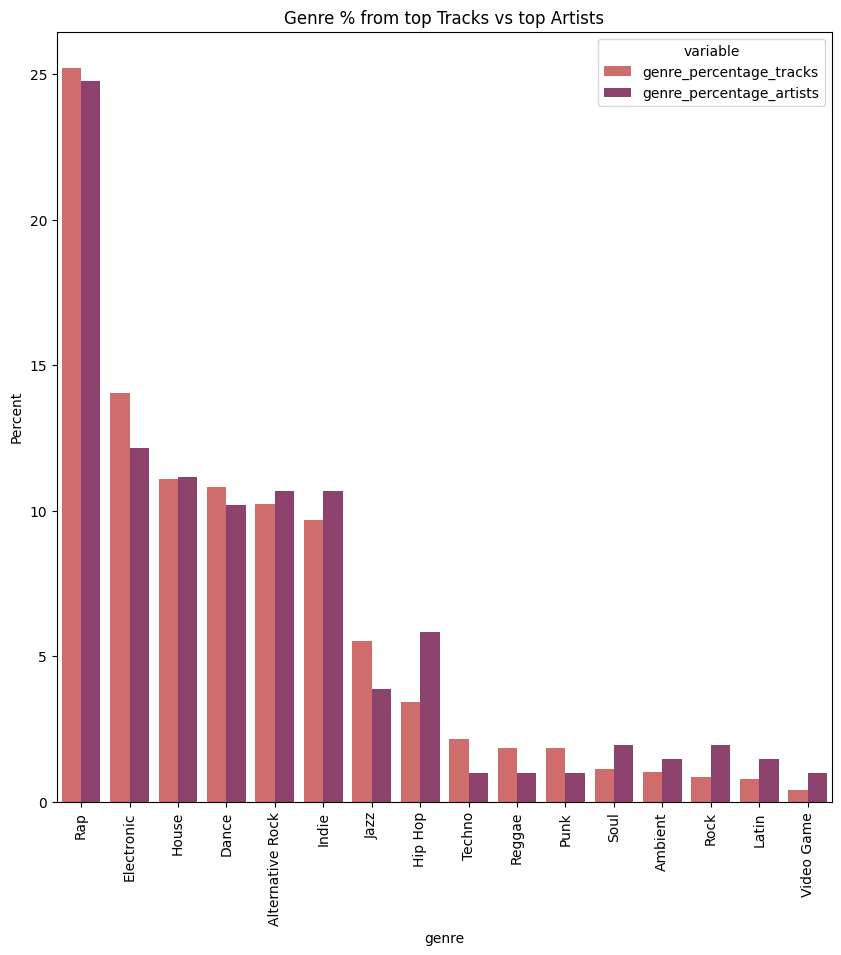

In [9]:
plt.figure(figsize= (10,10))
plt.title('Genre % from top Tracks vs top Artists')
sns.barplot(
    data= fixed_query,
    x= 'genre',
    y= 'value',
    hue= 'variable',
    palette = 'flare'
)
plt.ylabel('Percent')
plt.xticks(rotation= 90)
plt.show()

Now this looks much better. From this graph we can see that my genre percentages from top artists exceed my top tracks most in the genre of hip hop. On the contrary, the percentages from top tracks exceed my top artists significantly in the genres of jazz and electronic. However, for the most part, my top tracks genre composition matches my top artist genre composition fairly well, which intuitively makes sense.

# Query 4: Top 10 Highest Number of Tracks per Artist (Exlcuding Features)

In [10]:
query_4

,artist,genre,subgenre,followers,track_count,rank
0,Roddy Ricch,Rap,melodic rap,11141559,78,1
1,smokedope2016,Rap,cloud rap,68128,48,2
2,Snow Strippers,Electronic,electroclash,188890,45,3
3,1tbsp,House,lo-fi house,31722,43,4
4,Nujabes,Jazz,jazz rap,1287503,37,5
5,Title Fight,Alternative Rock,midwest emo,508715,37,6
6,Provoker,Alternative Rock,darkwave,62967,35,7
7,Amelie Lens,Techno,techno,652096,33,8
8,TOKYOPILL,Electronic,breakcore,114752,33,9
9,Funk Tribu,Dance,eurotrance,86282,30,10


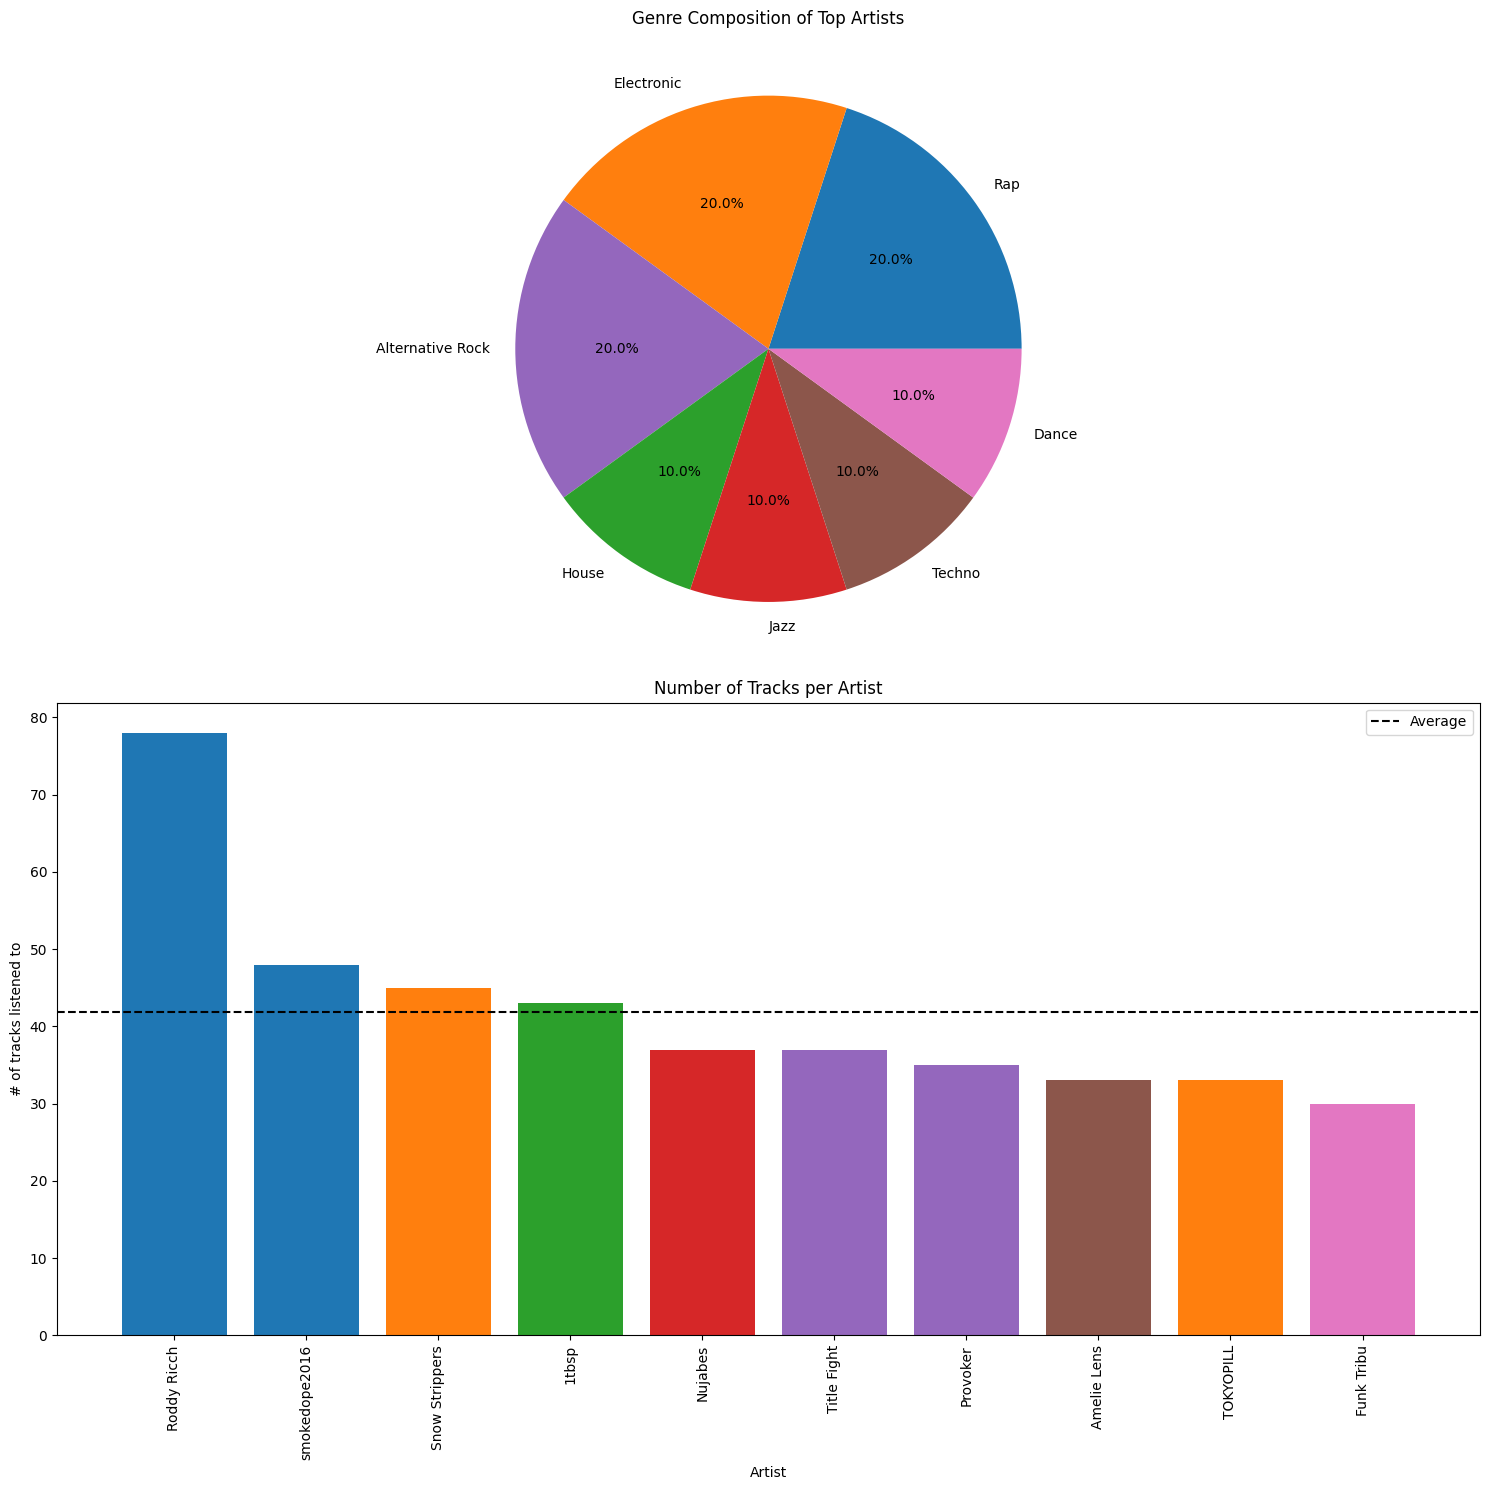

In [11]:
fig, ax = plt.subplots(2, 1, figsize= (15,15))
ax_1 = ax[0]
ax_2 = ax[1]
n = query_4['genre'].drop_duplicates().value_counts().sum()
colors = sns.color_palette(n_colors= n)
color_map = {genre: color for genre, color in zip(query_4['genre'].unique(), colors)}
query_4['colors'] = query_4['genre'].map(color_map)

#subplot 1
ax_1.pie(query_4['genre'].value_counts() ,
         labels= query_4['genre'].value_counts().index,
         autopct='%1.1f%%',
         colors= query_4['colors'].value_counts().index)
ax_1.set_title('Genre Composition of Top Artists')

#subplot 2
ax_2.bar(query_4['artist'], query_4['track_count'], color = query_4['colors'])
ax_2.axhline(query_4['track_count'].mean(), label='Average', linestyle='--', color='black')
ax_2.set_title('Number of Tracks per Artist')
ax_2.set_xlabel('Artist')
ax_2.set_ylabel('# of tracks listened to')
ax_2.tick_params(axis='x', rotation=90)
ax_2.legend()

plt.tight_layout()
plt.show()

Rap has the most cumulative tracks per genre, with the top 2 artists in this category being the highest number of tracks listened to. Without these 2 artists it seems that the number of tracks listened to from each artist falls around the range of 30-40 tracks. Despite only making 20% of my top 10 tracks, Rap, seems to be my most widely listened to genre from my top 10 artists.

# Query 5: Top 10 Highest Number of Tracks per Artist (Incl. Features)

In [ ]:
query_5

,artist,followers,track_count,rank
0,Roddy Ricch,11141559,84,1
1,smokedope2016,68128,49,2
2,Snow Strippers,188890,45,3
3,Amelie Lens,652096,42,4
4,Uyama Hiroto,105673,42,5
5,Nujabes,1287503,41,6
6,Title Fight,508715,37,7
7,1tbsp,31722,35,8
8,TOKYOPILL,114752,34,9
9,Marlon Hoffstadt,135316,31,10


Since no artist is close at all to 11 million followers and no artist is that close to 1.2 million followers, let us remove these 2 outliers so we can visualize more cleanly the rest of the top 10 for follower count.

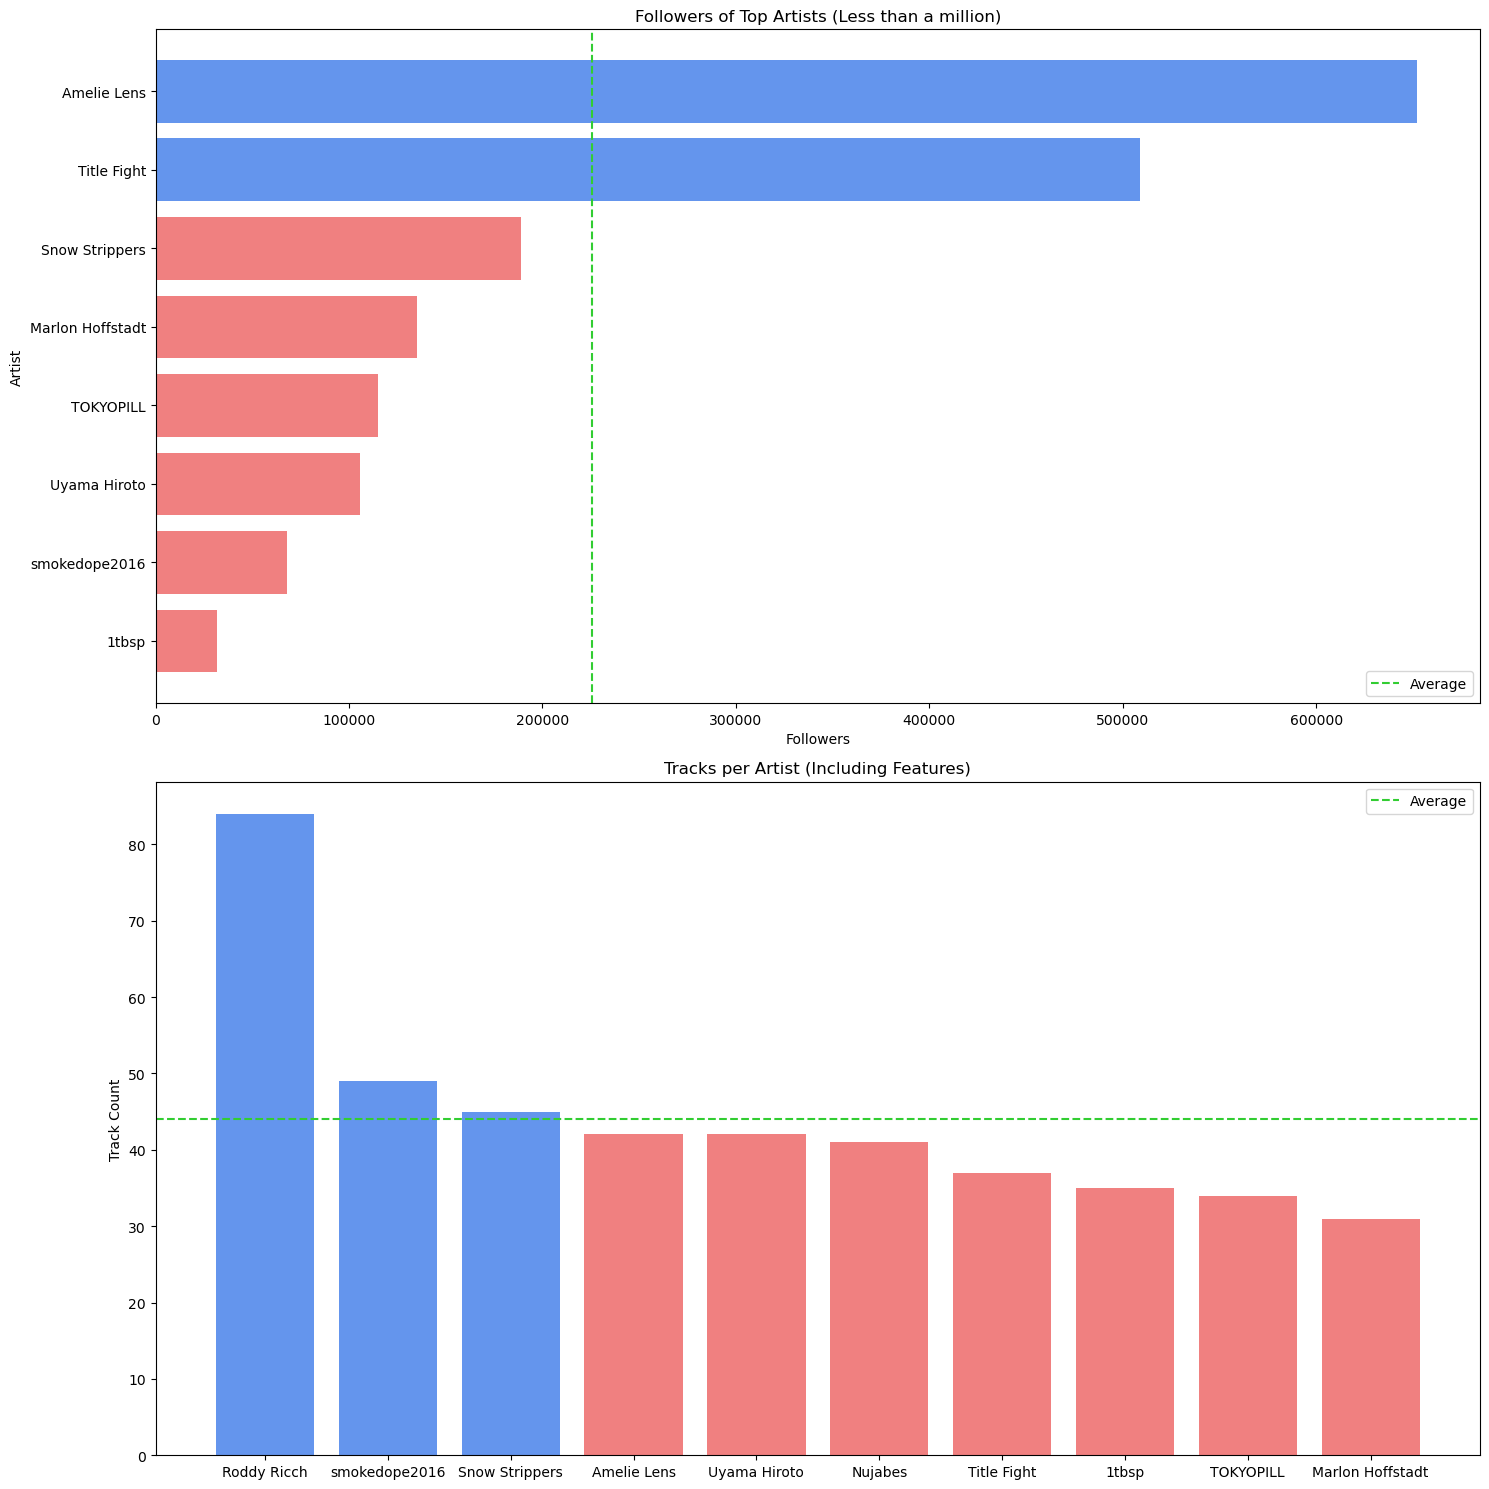

In [ ]:
fig, ax = plt.subplots(2, 1, figsize= (12,12))
ax_1 = ax[0]
ax_2 = ax[1]

cond = query_5['followers'] < 1000000
ax_1.set_title('Followers of Top Artists (Less than a million)')
x = query_5[cond].sort_values(by= 'followers')['artist']
y = query_5[cond]['followers'].sort_values()
colors = ['cornflowerblue' if val >= y.mean() else 'lightcoral' for val in y]
ax_1.barh(x, y, color= colors)
ax_1.axvline(y.mean(), label='Average', linestyle='--', color='limegreen')
ax_1.set_xlabel('Followers')
ax_1.set_ylabel('Artist')
ax_1.legend()

ax_2.bar(query_5['artist'],
         query_5['track_count'],
         color = ['cornflowerblue' if val >= query_5['track_count'].mean() else 'lightcoral' for val in query_5['track_count']])

ax_2.set_title('Tracks per Artist (Including Features)')
ax_2.axhline(query_5['track_count'].mean(), linestyle= '--', label= 'Average', color= 'limegreen')
ax_2.set_ylabel('Track Count')
ax_2.legend()


plt.tight_layout()
plt.show()

For followers per artist, the average is around 225k, with Amelie Lens (Techno) and Title Fight (Alt. Rock) being the only 2 artists far exceeding the average, the rest of the artists 100-150k mark and based off past tables, it seems that they are electronic/dance/house artists. Similar to the previous query, it seems that Rap again has the most cumulative tracks now that we include features. Much does not change except for the fact Marlon Hoffstadt (Dance) and Uyama Hiroto (Jazz) entered the top 10, while Provoker and Funk Tribu exited the top 10. I find it interesting that despite being a top 10 artist listened to, and having 3 songs within my top 10 tracks listened to that provoker exits the top 10 of tracks per artist including features. This could suggest the limited catalouge of provoker and the reason they exited the top 10.